<a href="https://colab.research.google.com/github/smkandel/DS_project/blob/main/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read final data
df = pd.read_csv('/content/drive/MyDrive/Predictive_maintenance_datasets/final_data1.csv')
df.shape[0]

876545

In [ ]:
#add machine data
df_machine = pd.read_csv('/content/drive/MyDrive/Predictive_maintenance_datasets/PdM_machines.csv')

#merge and override
df = df.merge(df_machine, on=['machineID'], how='left')
df

,failure,datetime,machineID,volt,rotate,pressure,vibration,volt_lag_1,vibration_lag_1,volt_lag_24,...,ham_comp1,ham_comp2,ham_comp3,ham_comp4,pm_comp1,pm_comp2,pm_comp3,pm_comp4,model,age
0,no,1/1/2015 6:00,1,176.217853,418.504078,113.077935,45.087686,NaN,NaN,NaN,...,1,1,1,1,0,0,0,0,model3,18
1,no,1/1/2015 7:00,1,162.879223,402.747490,95.460525,43.413973,176.217853,45.087686,NaN,...,2,2,2,2,0,0,0,0,model3,18
2,no,1/1/2015 8:00,1,170.989902,527.349825,75.237905,34.178847,162.879223,43.413973,NaN,...,3,3,3,3,0,0,0,0,model3,18
3,no,1/1/2015 9:00,1,162.462833,346.149335,109.248561,41.122144,170.989902,34.178847,NaN,...,4,4,4,4,0,0,0,0,model3,18
4,no,1/1/2015 10:00,1,157.610021,435.376873,111.886648,25.990511,162.462833,41.122144,NaN,...,5,5,5,5,0,0,0,0,model3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876540,no,1/1/2016 2:00,100,179.438162,395.222827,102.290715,50.771941,162.742669,44.382754,148.126516,...,1989,188,1988,1268,0,0,0,0,model4,5
876541,no,1/1/2016 3:00,100,189.617555,446.207972,98.180607,35.123072,179.438162,50.771941,136.363542,...,1990,189,1989,1269,0,0,0,0,model4,5
876542,no,1/1/2016 4:00,100,192.483414,447.816524,94.132837,48.314561,189.617555,35.123072,169.925104,...,1991,190,1990,1270,0,0,0,0,model4,5
876543,no,1/1/2016 5:00,100,165.475310,413.771670,104.081073,44.835259,192.483414,48.314561,163.234778,...,1992,191,1991,1271,0,0,0,0,model4,5


In [ ]:
df.info()
#categorical: failure and model, rest of all are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876545 entries, 0 to 876544
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   failure                    876545 non-null  object 
 1   datetime                   876545 non-null  object 
 2   machineID                  876545 non-null  int64  
 3   volt                       876545 non-null  float64
 4   rotate                     876545 non-null  float64
 5   pressure                   876545 non-null  float64
 6   vibration                  876545 non-null  float64
 7   volt_lag_1                 876544 non-null  float64
 8   vibration_lag_1            876544 non-null  float64
 9   volt_lag_24                876521 non-null  float64
 10  vibration_lag_24           876521 non-null  float64
 11  volt_rolling_3h            876543 non-null  float64
 12  volt_rolling_min_3h        876543 non-null  float64
 13  volt_rolling_max_3h        87

In [ ]:
# Drop the first 24 rows
df = df.drop(df.index[:24])

# Reset the index to have consecutive integer values after removing the rows
df.reset_index(drop=True, inplace=True)

In [ ]:
#no missing value confirmation
print(df.isna().sum())

failure                      0
datetime                     0
machineID                    0
volt                         0
rotate                       0
pressure                     0
vibration                    0
volt_lag_1                   0
vibration_lag_1              0
volt_lag_24                  0
vibration_lag_24             0
volt_rolling_3h              0
volt_rolling_min_3h          0
volt_rolling_max_3h          0
volt_rolling_24h             0
volt_rolling_min_24h         0
volt_rolling_max_24h         0
rotate_rolling_min_3h        0
rotate_rolling_max_3h        0
rotate_rolling_24h           0
rotate_rolling_min_24h       0
rotate_rolling_max_24h       0
pressure_rolling_3h          0
pressure_rolling_min_3h      0
pressure_rolling_max_3h      0
pressure_rolling_24h         0
pressure_rolling_min_24h     0
pressure_rolling_max_24h     0
vibration_rolling_3h         0
vibration_rolling_min_3h     0
vibration_rolling_max_3h     0
vibration_rolling_24h        0
vibratio

In [ ]:
#Drop unnecessary columns
columns_to_drop = ['datetime', 'machineID', 'pm_comp1', 'pm_comp2', 'pm_comp3', 'pm_comp4']
df1 = df.drop(columns=columns_to_drop)

In [ ]:
#getting index location of categoricals
print(df1.columns.get_loc('model'))

36


In [ ]:
#encoding categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Specify the column indices to encode
column_indices = [36]

#use label encoder and override
df1.iloc[:, column_indices]= df1.iloc[:, column_indices].apply(encoder.fit_transform) #direct override, no need to concatenate


In [ ]:
#encoding categorical labels
df1['y_var'] = encoder.fit_transform(df['failure'])

In [ ]:
df1.y_var.value_counts() #imbalanced

y_var
4    875760
1       259
0       192
3       179
2       131
Name: count, dtype: int64

In [ ]:
#10% random sampling

# Criteria 1: Retain all observations with labels 0, 1, 2, and 3
df2 = df1[df1['y_var'].isin([0, 1, 2, 3])]

# Criteria 2: Sample only 10% of observations with label 4
label_4_df = df1[df1['y_var'] == 4]
sampled_label_4_df = label_4_df.sample(frac=0.1, random_state=42)

# Concatenate both DataFrames to get the final df2
df2 = pd.concat([df2, sampled_label_4_df])

In [ ]:
#dependent & independent
y = df2.iloc[:, -1].values #values makes it array
X = df2.iloc[:, 9:38].values

**Solving the problem of imbalanced dataset**

In [ ]:
#Balancing using SMOTE
from imblearn.over_sampling import SMOTE

#Apply SMOTE to balance the classes on the whole dataset
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

In [ ]:
#Results after SMOTE
# Original count of labels in 'y'
original_label_counts = np.bincount(y)
print("Original Label Counts:")
print(original_label_counts)

# Resampled count of labels using SMOTE
resampled_smote_label_counts = np.bincount(y_resampled_smote)
print("\nResampled Label Counts using SMOTE:")
print(resampled_smote_label_counts)

Original Label Counts:
[  192   259   131   179 87576]

Resampled Label Counts using SMOTE:
[87576 87576 87576 87576 87576]


In [ ]:
#Split the resampled dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Apply the scaler to transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)

# Calculate precision, recall, and F1-score for each class
precision1 = precision_score(y_test, y_pred, average=None)
recall1 = recall_score(y_test, y_pred, average=None)
f1_score1 = f1_score(y_test, y_pred, average=None)

print("Precision of RF:", precision1)
print("Recall of RF:", recall1)
print("F1-score of RF:", f1_score1)

Accuracy: 0.9955124691696355
Precision of RF: [0.99592586 0.99227097 0.99664716 0.99365978 0.9991325 ]
Recall of RF: [0.99890647 0.99680292 0.99903161 0.99687642 0.98596051]
F1-score of RF: [0.99741394 0.99453178 0.99783796 0.9952655  0.9925028 ]


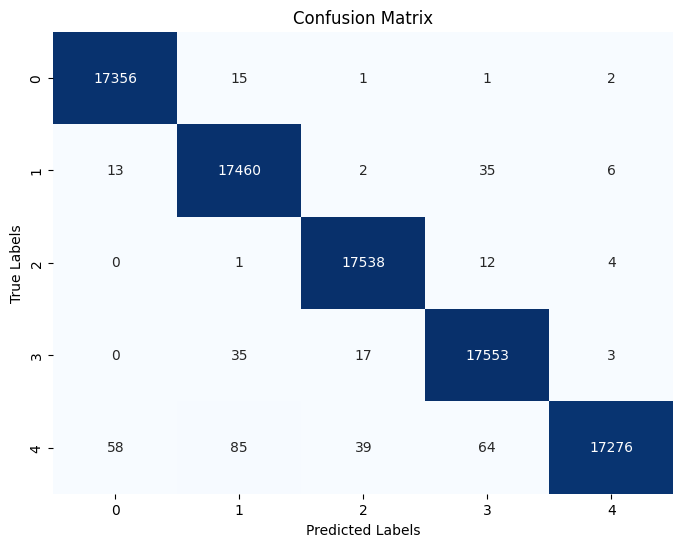

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train)
y_pred = xgb_classifier.predict(X_test_scaled)

In [ ]:
# Calculate accuracy
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2)

# Calculate precision, recall, and F1-score for each class
precision2 = precision_score(y_test, y_pred, average=None)
recall2 = recall_score(y_test, y_pred, average=None)
f1_score2 = f1_score(y_test, y_pred, average=None)

print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f1_score2)

Accuracy: 0.9963574495295515
Precision: [0.99678586 0.99583262 0.99608222 0.9934404  0.99971165]
Recall: [0.99953957 0.99588947 0.99931643 0.99772831 0.9893277 ]
F1-score: [0.99816081 0.99586105 0.9976967  0.99557973 0.99449257]


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Convert target labels to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)  # Assuming you have y_test

# Create a sequential neural network model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))

# Add output layer with appropriate activation function (softmax) for multi-class classification
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train_scaled, y_train_encoded, epochs=16, batch_size=32, validation_split=0.2)

# Make predictions on the test data using the trained neural network
y_pred_probabilities = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probabilities, axis=1)

Epoch 1/16
8758/8758 [==============================] - 37s 4ms/step - loss: 0.1283 - accuracy: 0.9644 - val_loss: 0.0913 - val_accuracy: 0.9763
Epoch 2/16
8758/8758 [==============================] - 35s 4ms/step - loss: 0.0837 - accuracy: 0.9783 - val_loss: 0.0785 - val_accuracy: 0.9788
Epoch 3/16
8758/8758 [==============================] - 33s 4ms/step - loss: 0.0752 - accuracy: 0.9802 - val_loss: 0.0737 - val_accuracy: 0.9799
Epoch 4/16
8758/8758 [==============================] - 34s 4ms/step - loss: 0.0700 - accuracy: 0.9814 - val_loss: 0.0717 - val_accuracy: 0.9800
Epoch 5/16
8758/8758 [==============================] - 33s 4ms/step - loss: 0.0662 - accuracy: 0.9821 - val_loss: 0.0710 - val_accuracy: 0.9802
Epoch 6/16
8758/8758 [==============================] - 35s 4ms/step - loss: 0.0631 - accuracy: 0.9828 - val_loss: 0.0667 - val_accuracy: 0.9817
Epoch 7/16
8758/8758 [==============================] - 36s 4ms/step - loss: 0.0608 - accuracy: 0.9832 - val_loss: 0.0627 - val_ac

In [ ]:
y_pred_probabilities = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probabilities, axis=1)

2737/2737 [==============================] - 5s 2ms/step


In [ ]:
#ANN performance metrics
# Calculate accuracy
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3)

# Calculate precision, recall, and F1-score for each class
precision3 = precision_score(y_test, y_pred, average=None)
recall3 = recall_score(y_test, y_pred, average=None)
f1_score3 = f1_score(y_test, y_pred, average=None)

print("Precision:", precision3)
print("Recall:", recall3)
print("F1-score:", f1_score3)

Accuracy: 0.9852356810084955
Precision: [0.98525124 0.97638771 0.98853055 0.97758448 0.99928537]
Recall: [0.99194245 0.98915277 0.99174024 0.99568378 0.95765324]
F1-score: [0.98858552 0.98272879 0.99013279 0.98655112 0.97802646]
